Running this file will make a csv file called pca_transformed_data.csv which will contain the new features to use for K means clustering (which explain 95% of the variance)

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import RobustScaler




In [ ]:

df = pd.read_csv('data/knnData/BA_US_knn_text.csv')

In [4]:
columns_to_drop = ['beer_name', 'beer_id','brewery_name','avg','user_state', 'beer_state', 'text']


X_drop_na = df.dropna()
X_drop = X_drop_na.drop(columns=columns_to_drop)
y = df['user_state']


(1829363, 10)


,brewery_id,style,abv,user_id,appearance,aroma,palate,taste,overall,rating
50,939.0,Munich Helles Lager,5.2,scaliasux.16164,4.00,4.00,3.5,3.50,4.00,3.75
53,939.0,Munich Helles Lager,5.2,jwc215.53566,3.25,3.25,3.5,3.25,3.25,3.28
62,939.0,Munich Helles Lager,5.2,cagocubs.283312,2.50,3.00,3.5,3.50,3.50,3.32


In [5]:
X = X_drop
#one hot encode beer style
#frequency encode brewery_id and user_id

X = pd.get_dummies(X, columns=['style'], prefix=['style'])
user_frequency = X['user_id'].value_counts() / len(X)  

#Map each user_id to its frequency
X['user_id_encoded'] = X['user_id'].map(user_frequency)
brewery_frequency = X['brewery_id'].value_counts() / len(X)  

#Map each brewery_id to its frequency
X['brewery_id_encoded'] = X['brewery_id'].map(brewery_frequency)
X = X.drop(columns=['user_id', 'brewery_id'])

#label encoding target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


,abv,appearance,aroma,palate,taste,overall,rating,style_Altbier,style_American Adjunct Lager,style_American Amber / Red Ale,...,style_Scottish Gruit / Ancient Herbed Ale,style_Smoked Beer,style_Tripel,style_Vienna Lager,style_Weizenbock,style_Wheatwine,style_Winter Warmer,style_Witbier,user_id_encoded,brewery_id_encoded
50,5.2,4.00,4.00,3.5,3.50,4.00,3.75,False,False,False,...,False,False,False,False,False,False,False,False,0.000170,0.000015
53,5.2,3.25,3.25,3.5,3.25,3.25,3.28,False,False,False,...,False,False,False,False,False,False,False,False,0.001498,0.000015
62,5.2,2.50,3.00,3.5,3.50,3.50,3.32,False,False,False,...,False,False,False,False,False,False,False,False,0.000114,0.000015


Manually removing features based on the correlation coefficient threshold of 0.8: Remove aroma (since rating is central and likely more informative).
Remove palate (same reasoning).
Remove overall (keep taste or vice versa)

In [8]:
features_to_remove = ['aroma', 'palate', 'overall']
X = X.drop(columns=features_to_remove)

In [9]:
scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled = X_scaled.dropna()

   abv  appearance  taste    rating  style_Altbier  \
0 -0.5         0.0  -0.50 -0.313433            0.0   
1 -0.5        -1.0  -0.75 -1.014925            0.0   
2 -0.5        -2.0  -0.50 -0.955224            0.0   
3 -0.5         0.0   0.00  0.134328            0.0   
4 -0.5         0.0   0.50  0.731343            0.0   

   style_American Adjunct Lager  style_American Amber / Red Ale  \
0                           0.0                             0.0   
1                           0.0                             0.0   
2                           0.0                             0.0   
3                           0.0                             0.0   
4                           0.0                             0.0   

   style_American Amber / Red Lager  style_American Barleywine  \
0                               0.0                        0.0   
1                               0.0                        0.0   
2                               0.0                        0.0   
3       

In [19]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca)

#each column represents a principal component and each row corresponds to the feature contribution to that component
components_df = pd.DataFrame(pca.components_, columns=X_scaled.columns)

         abv  appearance     taste    rating  style_Altbier  \
0   0.238847    0.464923  0.484243  0.649604      -0.001223   
1   0.037763    0.109478  0.124665  0.170600       0.000184   
2   0.194402   -0.046844 -0.084214 -0.108617      -0.002249   
3   0.924373   -0.075715 -0.134315 -0.161338      -0.002425   
4  -0.041769    0.865501 -0.389930 -0.308844       0.000466   
5   0.098396   -0.030920 -0.015701 -0.003369      -0.004367   
6  -0.038349   -0.015802 -0.024132  0.004360      -0.002629   
7  -0.061286   -0.012034 -0.031216  0.017663      -0.002664   
8   0.091718   -0.003682 -0.009843  0.003481      -0.004894   
9   0.022861   -0.007080 -0.006876 -0.000759      -0.004179   
10  0.010942    0.001827  0.032240 -0.021787      -0.001906   
11 -0.078344   -0.004392  0.021292 -0.015057       0.004110   
12 -0.019998   -0.022563 -0.014700  0.012912      -0.007011   
13  0.000131   -0.025491 -0.140375  0.100859      -0.007669   
14  0.011453   -0.036035 -0.288101  0.252244      -0.00

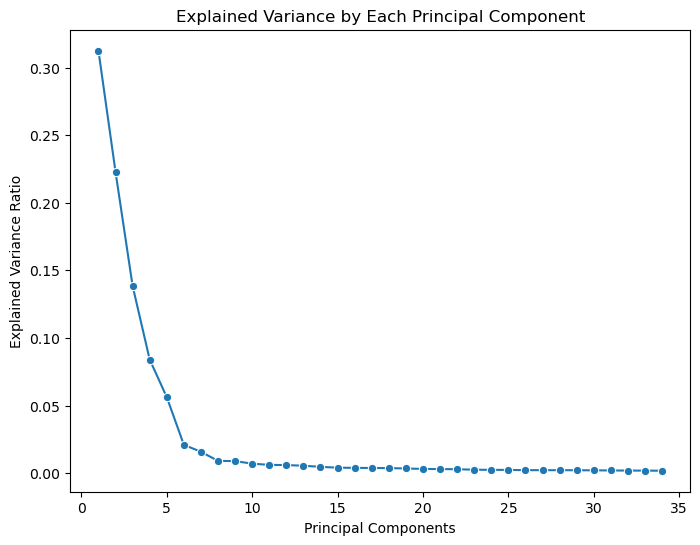

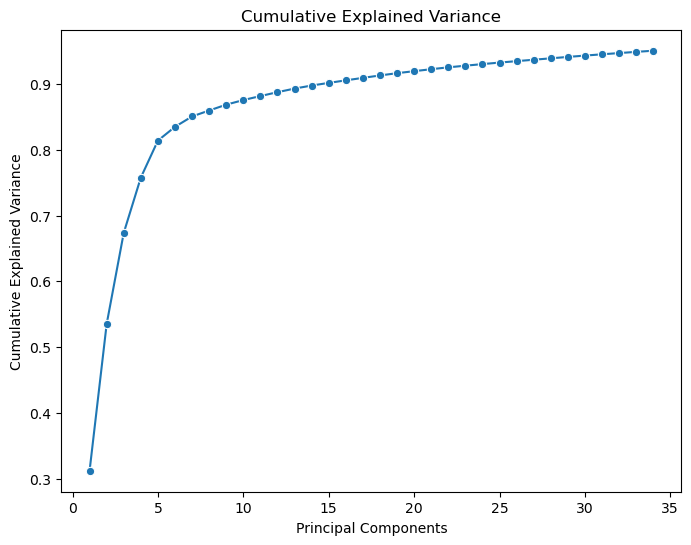

In [16]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=range(1, len(pca.explained_variance_ratio_) + 1),
             y=pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

plt.figure(figsize=(8, 6))
sns.lineplot(x=range(1, len(pca.explained_variance_ratio_) + 1),
             y=np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()